# Problem Statement
1. The dataset consists of monthly totals of international airline passengers from 1995 to 2002. Our main aim is to predict the number of passengers for the next five years using time series forecasting. Prepare a document for each model explaining How many dummy variables you have created and also include the RMSE value for each model.

# 🎯Business Objective

1. The core business objective of this project is to forecast the number of international airline passengers for the next five years (i.e., 2003–2007). Accurate predictions will help:
2. Airline companies make informed decisions on flight scheduling, staffing, and fuel planning.
3. Optimize resource allocation across routes and seasons.
4. Improve customer satisfaction through demand-responsive services.
5. Minimize costs due to under- or over-utilization.



# 🚧 Business Constraints
1. High Accuracy Required – Inaccurate forecasts can affect revenue and operations.
2. Timely Predictions – Forecasts must be available in advance for planning.
3. Model Interpretability – Stakeholders prefer simple, explainable models.
4. Seasonality Handling – Must capture monthly/seasonal variations accurately.
5. Scalability – Should be easy to update and expand to other routes or data.



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [12]:
df=pd.read_excel("Airlines Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [13]:
df.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


# Data Exploration

In [14]:
df.shape

(96, 2)

In [15]:
df.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [17]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [18]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

# Convert Data Column

In [15]:
df['Month']=pd.to_datetime(df['Month'])
df['Month_str']=df['Month'].dt.strftime('%b')
df['Year']=df['Month'].dt.year
df['t']=np.arange(1,len(df)+1)
df['t_square']=df['t']**2
df['log_passengers']=np.log(df['Passengers'])

# Create Dummy Variables For Months

In [18]:
month_dummies = pd.get_dummies(df['Month_str'])

data = pd.concat([df, month_dummies], axis=1)
data.head()

,Month,Passengers,Month_str,Year,t,t_square,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,False,False,False,False,True,False,False,False,False,False,False,False
1,1995-02-01,118,Feb,1995,2,4,4.770685,False,False,False,True,False,False,False,False,False,False,False,False
2,1995-03-01,132,Mar,1995,3,9,4.882802,False,False,False,False,False,False,False,True,False,False,False,False
3,1995-04-01,129,Apr,1995,4,16,4.859812,True,False,False,False,False,False,False,False,False,False,False,False
4,1995-05-01,121,May,1995,5,25,4.795791,False,False,False,False,False,False,False,False,True,False,False,False


# Train-Test Split

In [19]:
train = data.iloc[:84]  # Up to 2001
test = data.iloc[84:]   # 2002

# Build And Evaluate Models 

# 1. Linear Trend

In [20]:
model1 = ols('Passengers ~ t', data=train).fit()
pred1 = model1.predict(test['t'])
rmse1 = np.sqrt(mean_squared_error(test['Passengers'], pred1))
rmse1

53.199236534802715

# 2. Quadratic Trend

In [21]:
model2 = ols('Passengers ~ t + t_square', data=train).fit()
pred2 = model2.predict(test[['t', 't_square']])
rmse2 = np.sqrt(mean_squared_error(test['Passengers'], pred2))
rmse2

48.051888979330975

# 3.Additive Seasonality

In [22]:
model3 = ols('Passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data=train).fit()
pred3 = model3.predict(test)
rmse3 = np.sqrt(mean_squared_error(test['Passengers'], pred3))
rmse3

132.8197848142182

# 4.Additive Seasonality with Linear Trend

In [23]:
model4 = ols('Passengers ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data=train).fit()
pred4 = model4.predict(test)
rmse4 = np.sqrt(mean_squared_error(test['Passengers'], pred4))
rmse4

35.34895688467303

# 5. Additive Seasonality with Quadratic Trend

In [24]:
model5 = ols('Passengers ~ t + t_square + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data=train).fit()
pred5 = model5.predict(test)
rmse5 = np.sqrt(mean_squared_error(test['Passengers'], pred5))
rmse5

26.360817612109173

# 6. Multiplicative Seasonality

In [25]:
model6 = ols('log_passengers ~ Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data=train).fit()
pred6 = np.exp(model6.predict(test))
rmse6 = np.sqrt(mean_squared_error(test['Passengers'], pred6))
rmse6

140.06320204708658

# 7. Multiplicative Seasonality with Linear Trend

In [26]:
model7 = ols('log_passengers ~ t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec', data=train).fit()
pred7 = np.exp(model7.predict(test))
rmse7 = np.sqrt(mean_squared_error(test['Passengers'], pred7))
rmse7

10.519172544323741

In [28]:
# Create summary Table

In [29]:
results = pd.DataFrame({
    'Model': [
        'Linear Trend',
        'Quadratic Trend',
        'Additive Seasonality',
        'Additive Seasonality + Linear',
        'Additive Seasonality + Quadratic',
        'Multiplicative Seasonality',
        'Multiplicative Seasonality + Linear'
    ],
    'Dummy Variables': [0, 0, 12, 12, 12, 12, 12],
    'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6, rmse7]
})

print(results)


                                 Model  Dummy Variables        RMSE
0                         Linear Trend                0   53.199237
1                      Quadratic Trend                0   48.051889
2                 Additive Seasonality               12  132.819785
3        Additive Seasonality + Linear               12   35.348957
4     Additive Seasonality + Quadratic               12   26.360818
5           Multiplicative Seasonality               12  140.063202
6  Multiplicative Seasonality + Linear               12   10.519173


In [30]:
# 1. Create future dates from Jan 2003 to Dec 2007 (60 months)
future_dates = pd.date_range(start='2003-01-01', end='2007-12-01', freq='MS')
future_df = pd.DataFrame({'Month': future_dates})
future_df['Month_str'] = future_df['Month'].dt.strftime('%b')  # Month abbreviations


In [31]:
# 2. Create 't' variable (time index continuing from the existing data)
future_df['t'] = np.arange(len(data)+1, len(data)+len(future_df)+1)


In [32]:
# 3. Create dummy variables for each month
month_dummies = pd.get_dummies(future_df['Month_str'])


In [33]:
# Ensure the dummy variable columns match your training data
# (Assuming your training data also had dummies for Jan to Dec)
all_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month in all_months:
    if month not in month_dummies.columns:
        month_dummies[month] = 0  # Add missing columns if any

# Reorder the columns just in case
month_dummies = month_dummies[all_months]
month_dummies

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False
5,False,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,True,False,False


In [34]:
# 4. Combine dummy variables with future_df
future_df = pd.concat([future_df, month_dummies], axis=1)
future_df

,Month,Month_str,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2003-01-01,Jan,97,True,False,False,False,False,False,False,False,False,False,False,False
1,2003-02-01,Feb,98,False,True,False,False,False,False,False,False,False,False,False,False
2,2003-03-01,Mar,99,False,False,True,False,False,False,False,False,False,False,False,False
3,2003-04-01,Apr,100,False,False,False,True,False,False,False,False,False,False,False,False
4,2003-05-01,May,101,False,False,False,False,True,False,False,False,False,False,False,False
5,2003-06-01,Jun,102,False,False,False,False,False,True,False,False,False,False,False,False
6,2003-07-01,Jul,103,False,False,False,False,False,False,True,False,False,False,False,False
7,2003-08-01,Aug,104,False,False,False,False,False,False,False,True,False,False,False,False
8,2003-09-01,Sep,105,False,False,False,False,False,False,False,False,True,False,False,False
9,2003-10-01,Oct,106,False,False,False,False,False,False,False,False,False,True,False,False


In [35]:
# Step 2: Select the same columns used in training
predictors = ['t', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [36]:
# 5. Predict using model7
future_df['forecast_log'] = model7.predict(future_df[predictors])
future_df['forecast'] = np.exp(future_df['forecast_log'])  # Inverse of log


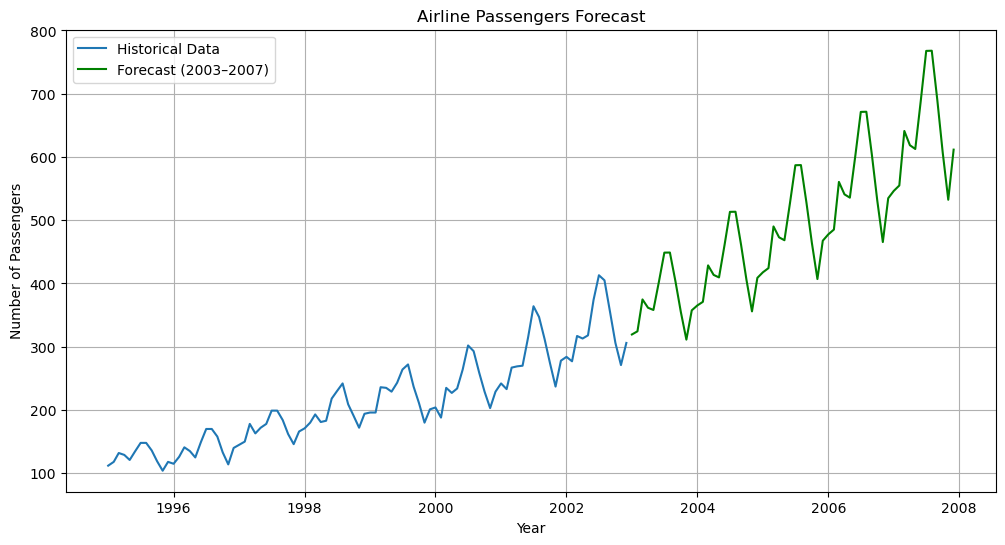

In [37]:
# 6. Plot the forecast along with historical data
plt.figure(figsize=(12,6))
plt.plot(data['Month'], data['Passengers'], label="Historical Data")
plt.plot(future_df['Month'], future_df['forecast'], label="Forecast (2003–2007)", color='green')
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("Airline Passengers Forecast")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
print(future_df[['Month', 'forecast']])


        Month    forecast
0  2003-01-01  319.371240
1  2003-02-01  324.390321
2  2003-03-01  374.769606
3  2003-04-01  361.614959
4  2003-05-01  358.117532
5  2003-06-01  403.115482
6  2003-07-01  448.759097
7  2003-08-01  448.927598
8  2003-09-01  403.307205
9  2003-10-01  355.035743
10 2003-11-01  311.215183
11 2003-12-01  357.517984
12 2004-01-01  365.244819
13 2004-02-01  370.984826
14 2004-03-01  428.600449
15 2004-04-01  413.556305
16 2004-05-01  409.556518
17 2004-06-01  461.017845
18 2004-07-01  513.217580
19 2004-08-01  513.410284
20 2004-09-01  461.237107
21 2004-10-01  406.032069
22 2004-11-01  355.917249
23 2004-12-01  408.870853
24 2005-01-01  417.707548
25 2005-02-01  424.272033
26 2005-03-01  490.163400
27 2005-04-01  472.958359
28 2005-05-01  468.384053
29 2005-06-01  527.237139
30 2005-07-01  586.934696
31 2005-08-01  587.155080
32 2005-09-01  527.487895
33 2005-10-01  464.353362
34 2005-11-01  407.040192
35 2005-12-01  467.599901
36 2006-01-01  477.705874
37 2006-02-0

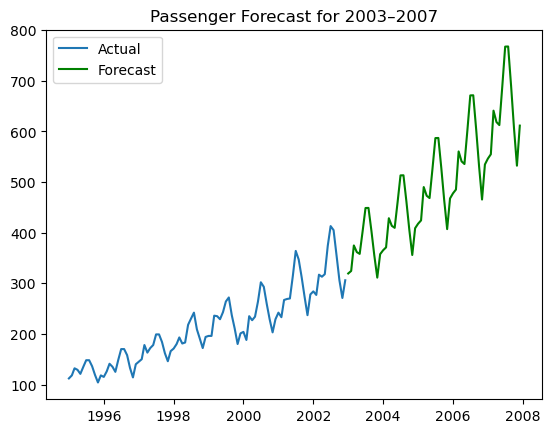

In [40]:
plt.plot(data['Month'], data['Passengers'], label='Actual')
plt.plot(future_df['Month'], future_df['forecast'], label='Forecast', color='green')
plt.legend()
plt.title("Passenger Forecast for 2003–2007")
plt.show()
